In [21]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../../../..')))

In [22]:
from data_sc.src.utils.db import get_db_connection

# Call the function
conn = get_db_connection()

In [23]:
import pandas as pd

# Load table into DataFrame
query = "SELECT * FROM legislative_proposal"
df = pd.read_sql(query, conn)

#### Step 1: Define the Specific Year to Analyze

In this step, we define the year we want to analyze. For this example, we will choose a single year, but you can adjust this to a range if needed.


In [24]:
year_to_analyze = 2024

In [25]:
# Filter data for the selected year
df_filtered = df[df['year_issue'] == year_to_analyze]

# If you want to analyze a range of years, use the following:
# start_year = 2015
# end_year = 2020
# df_filtered = df[(df['year_issue'] >= start_year) & (df['year_issue'] <= end_year)]


#### Step 3: Ensure 'latest_procedure_date' is in DateTime Format

Convert the `latest_procedure_date` to a proper datetime format to make sure we can perform time-based grouping.


In [32]:
# Ensure 'latest_procedure_date' is in datetime format
df_filtered.loc[:, 'latest_procedure_date'] = pd.to_datetime(df_filtered['latest_procedure_date'], errors='coerce')


#### Step 4: Extract Month and Year from 'latest_procedure_date'

To analyze proposals by month, we extract the month and year as a period (e.g., '2022-03' for March 2022).


In [33]:
# Extract Month and Year from 'latest_procedure_date'
df_filtered.loc[:, 'month_year'] = df_filtered['latest_procedure_date'].dt.to_period('M')

AttributeError: Can only use .dt accessor with datetimelike values

#### Step 5: Group by 'Month-Year' and Count the Number of Proposals

This step groups the data by month-year and counts how many proposals were made each month.


In [ ]:
# Group by 'month_year' and count the number of proposals
monthly_proposals = df_filtered.groupby('month_year').size().reset_index(name='proposal_count')


#### Step 6: Visualize the Number of Proposals per Month

We will use a bar plot to visualize the count of legislative proposals per month for the chosen year.


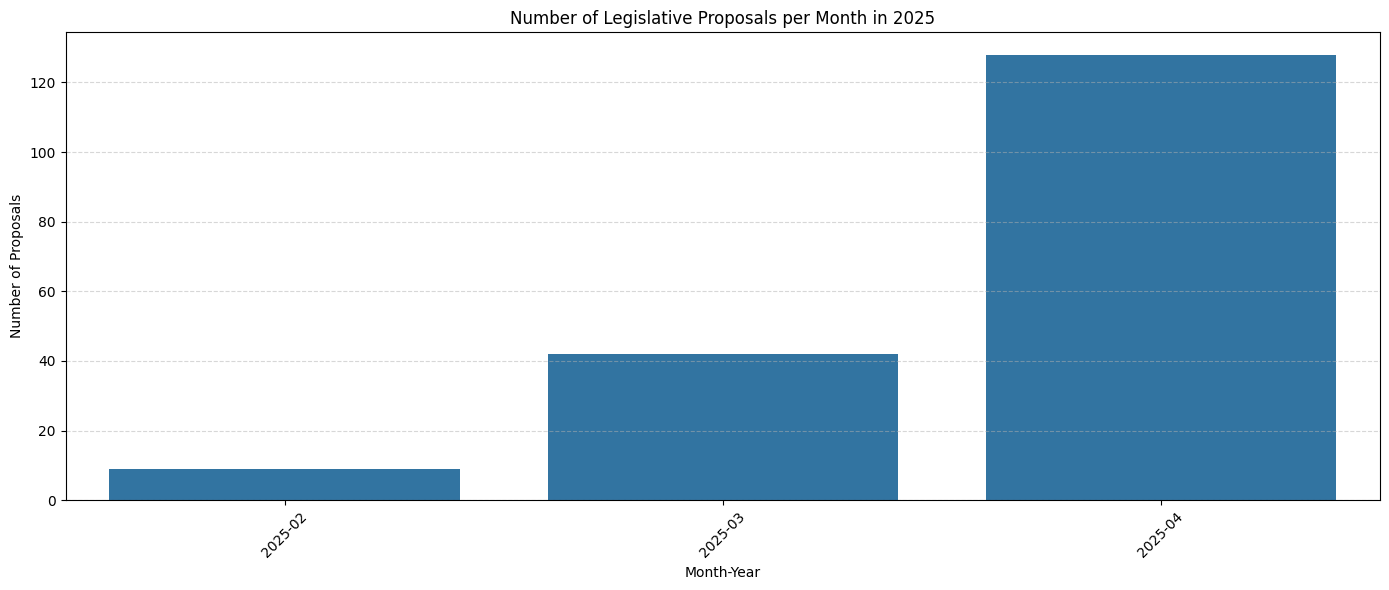

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the data using a bar plot
plt.figure(figsize=(14, 6))

# If you don't want to color by any specific variable, remove 'hue'
sns.barplot(x='month_year', y='proposal_count', data=monthly_proposals)

# Add titles and labels
plt.title(f"Number of Legislative Proposals per Month in {year_to_analyze}")
plt.xlabel("Month-Year")
plt.ylabel("Number of Proposals")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Display the monthly proposals summary
monthly_proposals

,month_year,proposal_count
0,2025-02,9
1,2025-03,42
2,2025-04,128
